#                                             ASSIGNMENT -2
#                                                    ID5030

## a) Linear Decision boundary

A linearly classified distribution is created and Gradient Descent is used to find this boundary between the classes. Learning rate will vary drastically from linear regression because of the change in size of errors (very small in this case).

Importing required libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Code to generate data with class 1 => 5*x1 +2*x2+3 < 0 and class 2 =>5*x1 +2*x2+3 > 0
This is for linear features

In [26]:
lims =20
def generate_data(size):
	x1    = np.random.uniform(low = -lims, high = lims , size = size).reshape((size,1))
	x2    = np.random.uniform(low = -lims, high = lims , size = size).reshape((size,1))
	label = np.array(list(map(lambda x1,x2: 1 if (30+5*x1+2*x2>0) else 0,x1,x2))).reshape((size,1))	
	return np.concatenate((x1,x2,label),axis=1)

Functions for showing plots, finding weights, estimated Y value and calculating loss . While finding the cross-entropy Loss, the values are clipped between 0.001 and 0.999 to eliminate the possibilty of nan error.

In [29]:
def update_weights(diff,weights,mini_batch,lrate):
	weights += (lrate/mini_batch.shape[0])*np.dot(np.transpose(mini_batch),diff)
	return weights

def Logistic_Regressor(data,weights,y_actual):
	probabs = 1/(1+ np.exp(-np.dot(data,weights)))
	labels  = np.array(list(map(lambda x:1 if x>0.5 else 0,probabs)))
	return probabs

def show_plot(weights,data,y_actual,i):
	data    = np.concatenate((data,y_actual),axis = 1)
	class_1 = data[np.logical_or.reduce([data[:,-1] == 1])]
	class_0 = data[np.logical_or.reduce([data[:,-1] == 0])]
	#0 => bias , 1=> x1 , 2=> x2
	plt.scatter(class_1[:,1],class_1[:,2],c = 'red')
	plt.scatter(class_0[:,1],class_0[:,2],c = 'green')
	line_x = np.linspace(-lims,lims,100)
	line_y = -((weights[1]/weights[2]) * line_x + weights[0]/weights[2])
	plt.plot(line_x,line_y)
	plt.xlim(-lims,lims)
	plt.ylim(-lims,lims)
	plt.title('Iteration ' + str(i))
	plt.show(block =False)
	plt.pause(0.01)
	#plt.close()
def cross_entropy_loss(y_actual,y_estimate):
	loss = -np.sum(y_actual*np.log(np.clip(y_estimate,0.0001,0.999)) + (1-y_actual)*np.log(np.clip((1-y_estimate),0.001,0.999)))
	return loss

Gradient Descent Function using Logistic Regression 

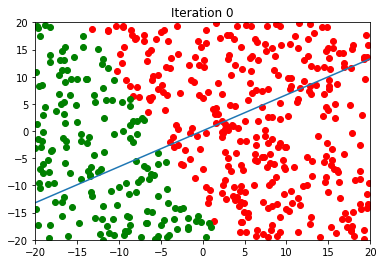

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp


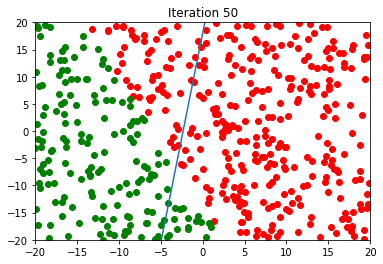

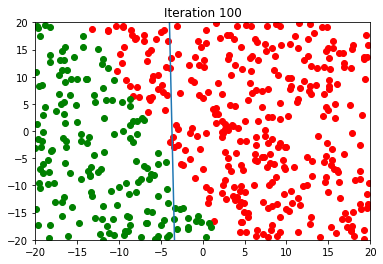

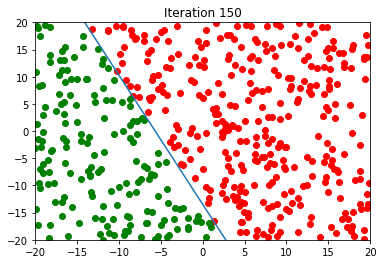

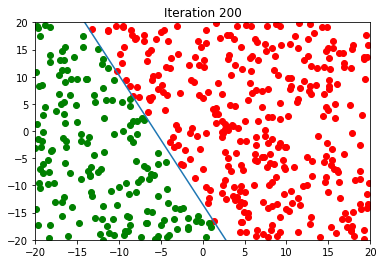

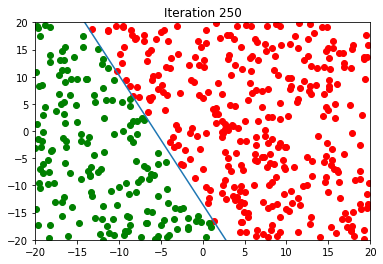

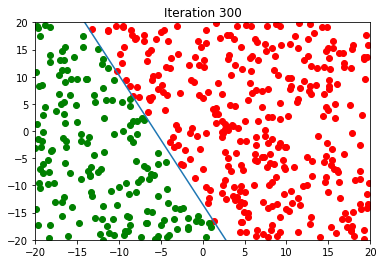

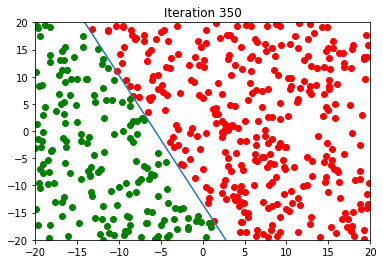

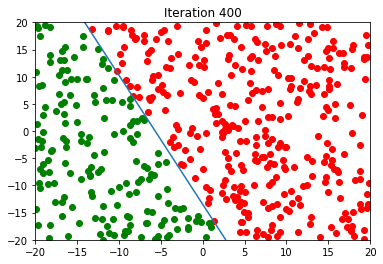

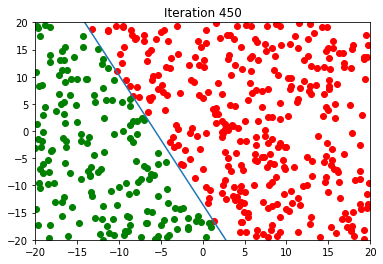

array([[ 8068.2430619 ],
       [ 1420.69403215],
       [  598.52306681]])

In [30]:
def Gradient_Descent(data = generate_data(500),lrate = 800):
	#Randomly initialized weights
	weights    = np.random.rand((data.shape[1])).reshape(data.shape[1],1)
	#Adding X0(ones) to data
	data       = np.concatenate((np.ones(shape=(data.shape[0],1)),data),axis=1)
	#Initializing all variables
	epoch 	   = 500
	y_actual   = data[:,-1].reshape(data.shape[0],1)
	data  	   = data[:,:-1]
	for i in range(epoch):
		#y_estimate = np.dot(data,weights)
		y_estimate = Logistic_Regressor(data,weights,y_actual)
		y_estimate = y_estimate.reshape(max(y_estimate.shape),1)
		error   =  cross_entropy_loss(y_actual,y_estimate)
		diff      = y_actual - y_estimate
		weights    = update_weights(diff,weights,data,lrate)
		if i%50 ==0:
			show_plot(weights,data,y_actual,i)
	#show_plot(weights,data,y_actual)
	#print(weights)	
	return weights

Gradient_Descent()

## b) Non-linear Decision boundary

Here our classfification boundary will be an ellipse in general. However other shapes can also be used . Gradient Descent function is rewritten with some changes to account for non-linearity. Also the variables taken here include X1, X1^2, X2, X2^2, X1*X2.

In [13]:
lims =7
def generate_data(size):
	x1    = np.random.uniform(low = -lims, high = lims , size = size).reshape((size,1))
	x2    = np.random.uniform(low = -lims, high = lims , size = size).reshape((size,1))
	label = np.array(list(map(lambda x1,x2: 1 if (25*x1*x1+36*x2*x2 + 10*x1*x2 -529>0) else 0,x1,x2))).reshape((size,1))	
	return np.concatenate((x1,x2,label),axis=1)

In [21]:
def update_weights(diff,weights,mini_batch,lrate):
	weights += (lrate/mini_batch.shape[0])*np.dot(np.transpose(mini_batch),diff)
	return weights

def Logistic_Regressor(data,weights,y_actual,rtype):
	probabs = 1/(1+ np.exp(-np.dot(data,weights)))
	labels  = np.array(list(map(lambda x:1 if x>0.5 else 0,probabs)))
	if rtype is 'p':
		return probabs
	else :
		return labels

def show_plot(weights,data,y_actual,i):
	data    = np.concatenate((data,y_actual),axis = 1)
	class_1 = data[np.logical_or.reduce([data[:,-1] == 1])]
	class_0 = data[np.logical_or.reduce([data[:,-1] == 0])]
	#0 => bias , 1=> x1 , 2=> x2
	plt.scatter(class_1[:,1],class_1[:,2],c = 'red',label= 'class_1')
	plt.scatter(class_0[:,1],class_0[:,2],c = 'green',label='class_0')
	# line_x = np.linspace(-lims,lims,100)
	# line_y = -((weights[1]/weights[2]) * line_x + weights[0]/weights[2])
	# plt.plot(line_x,line_y)

	delta = 0.025
	xrange = np.arange(-lims,lims, delta)
	yrange = np.arange(-lims,lims, delta)
	X, Y = np.meshgrid(xrange,yrange)

	# F is one side of the equation, G is the other
	A1 = weights[0]
	A2 = weights[1]*X
	A3 = weights[2]*Y
	A4 = weights[3]*X**2
	A5 = weights[4]*Y**2
	A6 = weights[5]*X*Y

	plt.contour(X, Y,A1+A2+A3+A4+A5+A6, [0])
	#matplotlib.pyplot.ylim(-5,8)

	plt.xlabel('X1')
	plt.ylabel('X2')
	plt.xlim(-lims,lims)
	plt.ylim(-lims,lims)
	plt.title('Iteration ' + str(i))
	plt.legend()
	plt.show(block =False)
	plt.pause(1)	
	plt.close()

def cross_entropy_loss(y_actual,y_estimate):
	loss = -np.sum(y_actual*np.log(np.clip(y_estimate,0.0001,0.999)) + (1-y_actual)*np.log(np.clip((1-y_estimate),0.001,0.999)))
	return loss

def non_linearize(data):
	x3 = (data[:,0]**2).reshape((data.shape[0],1))
	x4 = (data[:,1]**2).reshape((data.shape[0],1))
	x5 = (data[:,0]*data[:,1]).reshape((data.shape[0],1))
	label = data[:,-1].reshape((data.shape[0],1))
	return np.concatenate((data[:,0].reshape((data.shape[0],1)),data[:,1].reshape((data.shape[0],1)),x3,x4,x5,label),axis=1)

In [24]:
def Gradient_Descent(data,lrate = 80):
	global errorlist
	#Randomly initialized weights
	data = non_linearize(data)	
	weights    = np.random.rand((data.shape[1])).reshape(data.shape[1],1)
	#Adding X0(ones) to data
	data       = np.concatenate((np.ones(shape=(data.shape[0],1)),data),axis=1)
	#Initializing all variables
	epoch 	   = 300
	y_actual   = data[:,-1].reshape(data.shape[0],1)
	data  	   = data[:,:-1]
	for i in range(epoch):
		if i%100 == 0:
			lrate/=2			
		if i%50 ==0:
			show_plot(weights,data,y_actual,i)
		#y_estimate = np.dot(data,weights)
		y_estimate = Logistic_Regressor(data,weights,y_actual,'p')
		y_estimate = y_estimate.reshape(max(y_estimate.shape),1)
		error      =  cross_entropy_loss(y_actual,y_estimate)
		diff       = y_actual - y_estimate
		weights    = update_weights(diff,weights,data,lrate)
		#print(len(errorlist))
		errorlist+=[error]
	show_plot(weights,data,y_actual,i)		
	#print(weights.shape)	
	return weights

Since it is difficult to draw an implicit function using Matplotlib, we will check accuracy of our classification by creating a test set and finding the accuracy on that set. For the same, we define the following function

Another point to be noted is that the weights learned by the model may not seem to be correct on first look. However, one can check it by using accuracy() and verify it by printing both Y_actual and Y_estimate.

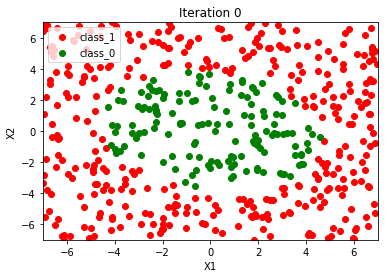

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp


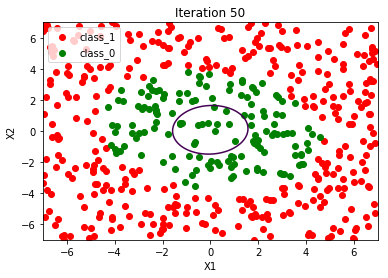

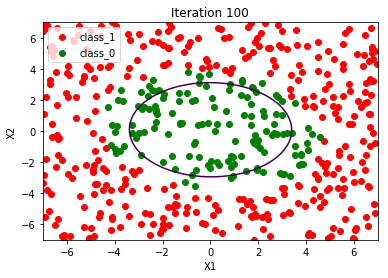

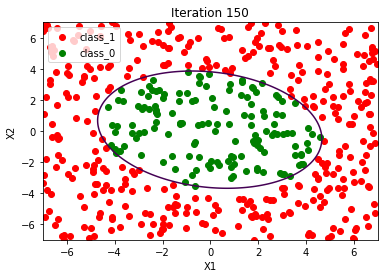

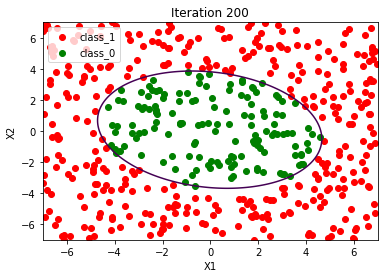

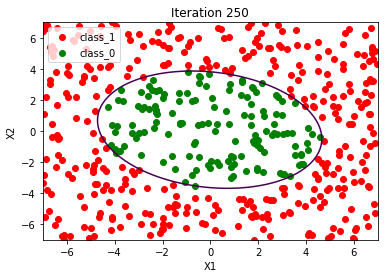

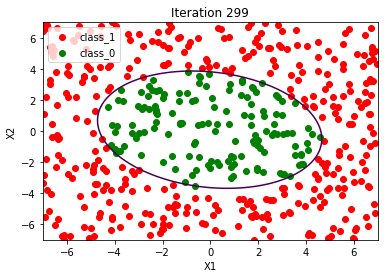

NO: of wrongly classified points0.0
Accuracy : 100.0


In [25]:
def get_accuracy(data ,train_set):
	data = non_linearize(data)
	weights=Gradient_Descent(train_set)
	data       = np.concatenate((np.ones(shape=(data.shape[0],1)),data),axis=1)
	y_actual   = data[:,-1].reshape(data.shape[0],1)
	data  	   = data[:,:-1]	
	y_estimate = Logistic_Regressor(data,weights,y_actual,'l')
	y_estimate = y_estimate.reshape(max(y_estimate.shape),1)
	print('NO: of wrongly classified points' +str(np.sum(abs(y_estimate-y_actual).T)))
	print('Accuracy : ' +str(100-np.sum(abs(y_estimate-y_actual))*100/data.shape[0]))

train_set = generate_data(500)
test_set  = generate_data(100)
get_accuracy(train_set,train_set)

Plotting Loss function with respect to Epochs

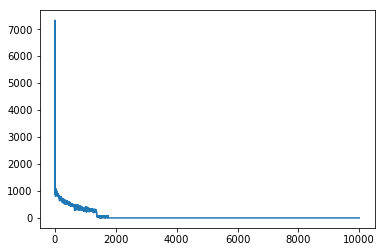

In [31]:
plt.plot([i for i in range(len(errorlist))],errorlist)
plt.show()

## 2) MNIST Dataset

Opening all the extracted image files from files downloaded from the specified directory

In [5]:
test_img_set=[]
train_img_set=[]
test_lbl_set=[]
train_lbl_set=[]
with open('MNIST Dataset/t10k-images.idx3-ubyte','rb') as fin:
	fin.read(16)
	test_img_set = np.fromfile(fin, dtype=np.uint8).reshape(10000, 784)
with open('MNIST Dataset/train-images.idx3-ubyte','rb') as fin:
	fin.read(16)
	train_img_set = np.fromfile(fin, dtype=np.uint8).reshape(60000, 784)
with open('MNIST Dataset/t10k-labels.idx1-ubyte','rb') as fin:
	fin.read(8)
	test_lbl_set = np.fromfile(fin, dtype=np.uint8).reshape(10000,1)
with open('MNIST Dataset/train-labels.idx1-ubyte','rb') as fin:
	fin.read(8)
	train_lbl_set = np.fromfile(fin, dtype=np.uint8).reshape(60000,1)

test_set = np.concatenate((test_img_set,test_lbl_set),axis=1)
train_set = np.concatenate((train_img_set,train_lbl_set),axis=1)
test_set =  test_set[np.logical_or(test_set[:,-1]==1, test_set[:,-1]==0)]
train_set = train_set[np.logical_or(train_set[:,-1]==1 ,train_set[:,-1]==0)]

Gradient Descent algo using the above functions of Logistic Regression, Update weights and Cross entropy loss.

In [10]:
errorlist=[]
def Gradient_Descent(data,lrate = 0.008):
	global errorlist
	#Randomly initialized weights
	#data = non_linearize(data)	
	weights    = np.random.rand((data.shape[1])).reshape(data.shape[1],1)
	#Adding X0(ones) to data
	data       = np.concatenate((np.ones(shape=(data.shape[0],1)),data),axis=1)
	#Initializing all variables
	epoch 	   = 100
	y_actual   = data[:,-1].reshape(data.shape[0],1)
	data  	   = data[:,:-1]
	for i in range(epoch):
		#y_estimate = np.dot(data,weights)
		y_estimate = Logistic_Regressor(data,weights,y_actual,'p')
		y_estimate = y_estimate.reshape(max(y_estimate.shape),1)
		error      =  cross_entropy_loss(y_actual,y_estimate)
		diff       = y_actual - y_estimate
		weights    = update_weights(diff,weights,data,lrate)
		errorlist+=[error]
	#show_plot(weights,data,y_actual)		
	print(weights.shape)	
	return weights

Function to get accuracy of the model (Based on binary classification)

In [11]:
def get_accuracy(data =test_set,weights=Gradient_Descent(train_set)):
	#data = non_linearize(data)
	data       = np.concatenate((np.ones(shape=(data.shape[0],1)),data),axis=1)
	y_actual   = data[:,-1].reshape(data.shape[0],1)
	data  	   = data[:,:-1]	
	y_estimate = Logistic_Regressor(data,weights,y_actual,'l')
	y_estimate = y_estimate.reshape(max(y_estimate.shape),1)
	print(100-np.sum(abs(y_estimate-y_actual))*100/data.shape[0])

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp


(785, 1)


Getting accuracy and plotting error result

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in exp


99.9054373522
[40921.37989066021, 30561.027902448965, 53657.343185258294, 981.95680615119954, 846.08808084898374, 737.8993305158333, 651.71494186500627, 566.3321350513213, 562.91313592506015, 542.19287158911436, 507.65909769587171, 466.21856902398031, 454.70764455967731, 429.40317754207553, 414.84585431256289, 410.99231044824097, 420.17487116676807, 413.26811638811955, 415.58128973151969, 410.9665317954591, 397.15302223816195, 383.33951268086491, 376.44421270609831, 376.43275790221634, 362.72146163636216, 362.64078986607825, 356.48772517007205, 371.04401688007721, 373.97129935327757, 376.34015632880028, 376.43375840254987, 376.43375840254987, 369.96440360544943, 369.52700362390135, 369.52700362390135, 369.52700362390135, 369.52700362390135, 369.52700362390135, 362.62558124701559, 362.62024884525283, 362.62024884525283, 362.62024884525283, 362.62024884525283, 355.71349406660426, 355.71349406660426, 348.83817545102988, 348.80673928795568, 346.81434827607842, 344.05348459151298, 341.46499

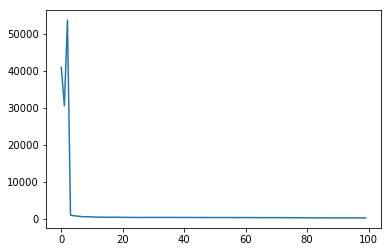

In [12]:
get_accuracy()
print(errorlist)

plt.plot([i for i in range(len(errorlist))],errorlist)
plt.show()